In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
#import sklearn package details
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
# load the data
df = pd.read_csv('games.csv')

In [43]:
# Exploratory data analysis
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [6]:
print (df.shape)

(81312, 20)


In [7]:
df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [8]:
df.columns ## We are interested in average_rating which is what we want to predict based on the other characteristics of the game

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E3928DD48>]]


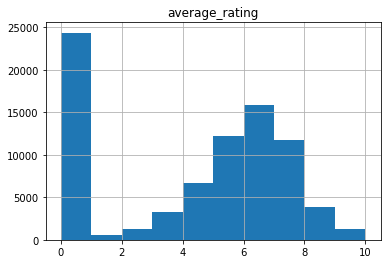

In [44]:
print(df.hist(['average_rating']))

In [45]:
#we have about 25000 games not rated. Lets explore more what this means. For rest, we have avg. prediction of about 6
#Print the 1st row of all the games with 0 scores
print(df[(df['average_rating']==0)].iloc[0])
df[(df['average_rating']==0)].describe() # we see users_rated is 0 for all of these meaning no one has rated these games.

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,24380.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24380.0,24380.0,24380.0,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000
mean,91318.910747,1647.510357,1.961606,5.786948,32.313220,30.200008,32.313220,5.562205,0.0,0.0,0.0,1.516120,0.079368,0.307588,1.105209,0.230804,0.035439,0.064623
std,57407.651794,753.173533,1.194273,66.871729,111.860042,108.705701,111.860042,5.129236,0.0,0.0,0.0,2.809881,0.369331,1.685498,7.934577,0.693659,0.199406,0.394526
min,318.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35511.500000,1952.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,89005.000000,1997.000000,2.000000,4.000000,20.000000,15.000000,20.000000,6.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,143968.500000,2010.000000,2.000000,6.000000,45.000000,30.000000,45.000000,10.000000,0.0,0.0,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,184451.000000,2018.000000,99.000000,10000.000000,10000.000000,10000.000000,10000.000000,90.000000,0.0,0.0,0.0,87.000000,16.000000,72.000000,424.000000,28.000000,3.000000,5.000000


[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E3E4FE808>]]


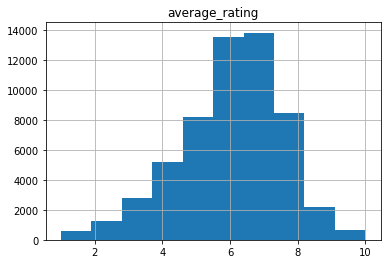

In [70]:
#lets remove those rows where user_rated is 0

df = df[df['users_rated']>0]

#Also, remove any rows with missing values as that will impact our results too
df = df.dropna()

#now plotting the histogram again to see the 0s are taken care of
print(df.hist(['average_rating']))

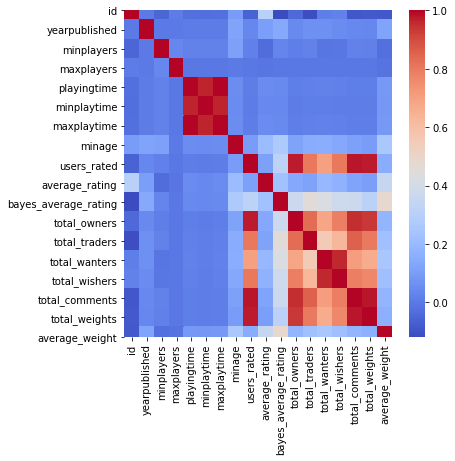

In [63]:
#lets try a heatmap on the final dataset to show the correlation
fig,axes = plt.subplots(1,1,figsize = (6,6))
dfc = df.corr() #remember to correlate the data for heat maps
sns.heatmap(dfc, cmap = 'coolwarm')

In [74]:
#Data pre-processing to remove some data we do not need Ex, Id, bayes_average rating (as its based of average rating)

temp = df.drop(['id','name','type','bayes_average_rating'],axis =1)
temp.columns

Index(['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
       'total_comments', 'total_weights', 'average_weight'],
      dtype='object')

In [75]:
#Training the model
X = temp.drop('average_rating',axis =1)
y = temp['average_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)

(39825, 15)
(17069, 15)


In [77]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)

5.029030990018921


In [78]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [79]:
cdf

,Coeff
yearpublished,0.000172
minplayers,-0.067743
maxplayers,0.000288
playingtime,0.000122
minplaytime,-0.000157
maxplaytime,0.000122
minage,0.037448
users_rated,-0.000574
total_owners,0.000385
total_traders,-0.003400


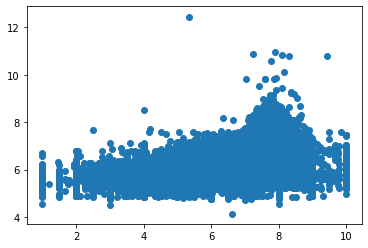

In [80]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

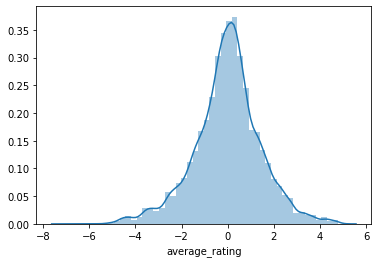

In [82]:
sns.distplot((y_test-predictions)) 
# Model has a normal distribution around 0 for the residuals of test result vs. predictions meaning it worked right

In [86]:
from sklearn import metrics
metrics.mean_squared_error(y_test, predictions)
# MSE value suggests this is not a perfect fit although its a good fit, this is expected as the dataset is complex for a linear model to fit it

2.106285996251729

In [90]:
#RANDOM_FOREST
#initialize the model
rfr = RandomForestRegressor(n_estimators = 200, random_state =1)

#fit to the data
rfr.fit(X_train, y_train)

#predict the results
rfr_pred = rfr.predict(X_test)

In [91]:
#Compute the error between actual and predicted results. THIS IS BETTER THAN LINEAR REG. NON-LINEAR MODEL IS BETTER
metrics.mean_squared_error(y_test, rfr_pred)


1.4854736684929222

In [92]:
# Lets try to see one example from the dataset and see how the model predicts
X_test.iloc[0]

yearpublished     2013.0000
minplayers           2.0000
maxplayers           4.0000
playingtime         30.0000
minplaytime         30.0000
maxplaytime         30.0000
minage              10.0000
users_rated       1119.0000
total_owners      1892.0000
total_traders       43.0000
total_wanters      246.0000
total_wishers      609.0000
total_comments     327.0000
total_weights       88.0000
average_weight       1.8977
Name: 2602, dtype: float64

In [111]:
ratingLR = lm.predict(X_test.iloc[0].values.reshape(1,-1)) #values.reshape is needed to test on a single value. 
ratingRF = rfr.predict(X_test.iloc[0].values.reshape(1,-1)) #(1,-1) means 1row and cols is unknown. This is just easier
# to write as we dont need to worry about column count. You can also also (1,15) as we know X_test has 15 cols.
print('Linear Regression Rating:',ratingLR)

print('Random Forest Rating:',ratingRF)
print('\n')
print('Actual result:', y_test.iloc[0]) # Random Forest is closer to actual vs. Linear Regression

Linear Regression Rating: [7.16027427]
Random Forest Rating: [6.99456854]


Actual result: 7.06652
